In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/california-housing-prices/housing.csv


In [4]:
df=pd.read_csv('/kaggle/input/california-housing-prices/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
df.shape

(20640, 10)

In [7]:
df['near_bay']=0
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,near_bay
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,0


In [8]:
df.loc[df['ocean_proximity']=='NEAR BAY','near_bay']=1
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,near_bay
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1


In [9]:
df['ocean_proximity']=='NEAR BAY'

0         True
1         True
2         True
3         True
4         True
         ...  
20635    False
20636    False
20637    False
20638    False
20639    False
Name: ocean_proximity, Length: 20640, dtype: bool

In [12]:
df.iloc[20639]

longitude             -121.24
latitude                39.37
housing_median_age       16.0
total_rooms            2785.0
total_bedrooms          616.0
population             1387.0
households              530.0
median_income          2.3886
median_house_value    89400.0
ocean_proximity        INLAND
near_bay                    0
Name: 20639, dtype: object

In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.sort_values(['median_house_value']).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
9188,-117.86,34.24,52.0,803.0,267.0,628.0,225.0,4.1932,14999.0,INLAND
19802,-123.17,40.31,36.0,98.0,28.0,18.0,8.0,0.5360,14999.0,INLAND
2799,-117.02,36.40,19.0,619.0,239.0,490.0,164.0,2.1000,14999.0,INLAND
2521,-122.74,39.71,16.0,255.0,73.0,85.0,38.0,1.6607,14999.0,INLAND
5887,-118.33,34.15,39.0,493.0,168.0,259.0,138.0,2.3667,17500.0,<1H OCEAN


In [7]:
df.sort_values(['median_house_value'],ascending=False).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
10667,-117.88,33.55,27.0,2278.0,316.0,772.0,304.0,10.1275,500001.0,<1H OCEAN
16916,-122.34,37.57,52.0,2635.0,408.0,967.0,374.0,7.0422,500001.0,NEAR OCEAN
16946,-122.33,37.55,33.0,2199.0,312.0,827.0,319.0,6.1349,500001.0,NEAR OCEAN
8877,-118.49,34.04,48.0,2381.0,345.0,859.0,306.0,8.0257,500001.0,<1H OCEAN
8878,-118.50,34.04,52.0,3000.0,374.0,1143.0,375.0,15.0001,500001.0,<1H OCEAN


In [10]:
df.sort_values(['housing_median_age','total_rooms']).head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12286,-116.95,33.86,1.0,6.0,2.0,8.0,2.0,1.6250,55000.0,INLAND
3130,-117.95,35.08,1.0,83.0,15.0,32.0,15.0,4.8750,141700.0,INLAND
18972,-122.00,38.23,1.0,2062.0,343.0,872.0,268.0,5.2636,191300.0,INLAND
19536,-120.93,37.65,1.0,2254.0,328.0,402.0,112.0,4.2500,189200.0,INLAND
2774,-115.80,33.26,2.0,96.0,18.0,30.0,16.0,5.3374,47500.0,INLAND


In [12]:
df.groupby(['total_rooms','total_bedrooms']).mean()

,,longitude,latitude,housing_median_age,population,households,median_income,median_house_value
total_rooms,total_bedrooms,,,,,,,
2.0,2.0,-117.79,35.21,4.0,6.0,2.0,2.3750,137500.0
6.0,2.0,-116.95,33.86,1.0,8.0,2.0,1.6250,55000.0
8.0,1.0,-122.50,37.79,52.0,13.0,1.0,15.0001,500001.0
11.0,11.0,-118.44,34.28,46.0,24.0,13.0,2.8750,162500.0
12.0,4.0,-122.29,37.81,46.0,18.0,7.0,0.4999,67500.0
...,...,...,...,...,...,...,...,...
30450.0,5033.0,-117.20,33.58,2.0,9419.0,3197.0,4.5936,174300.0
32054.0,5290.0,-117.78,34.03,8.0,15507.0,5050.0,6.0191,253900.0
32627.0,6445.0,-121.79,36.64,11.0,28566.0,6082.0,2.3087,118800.0


In [16]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

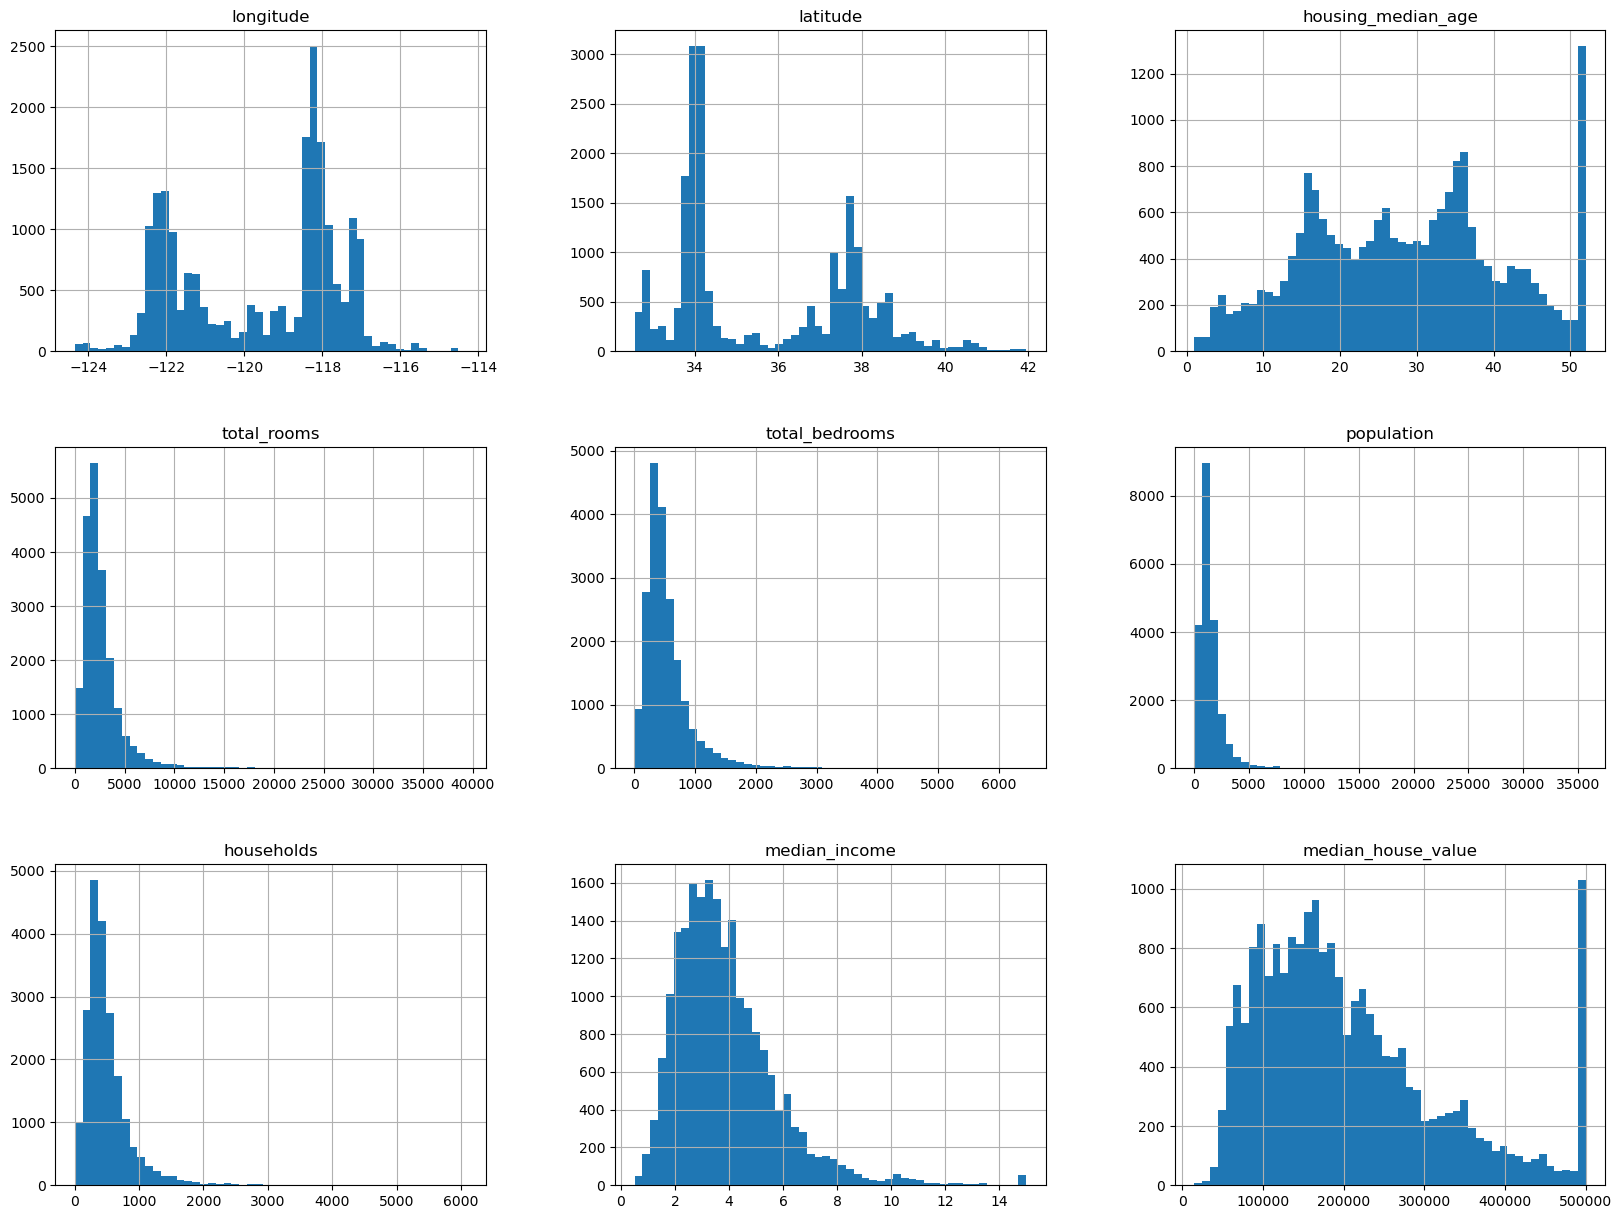

In [18]:
import matplotlib.pyplot as plt
df.hist(bins=50,figsize=(20,15))

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

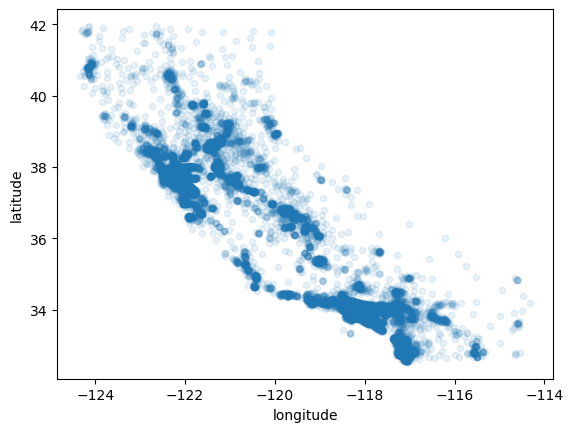

In [19]:
df.plot(kind = "scatter", x ="longitude", y = "latitude", alpha = 0.1)

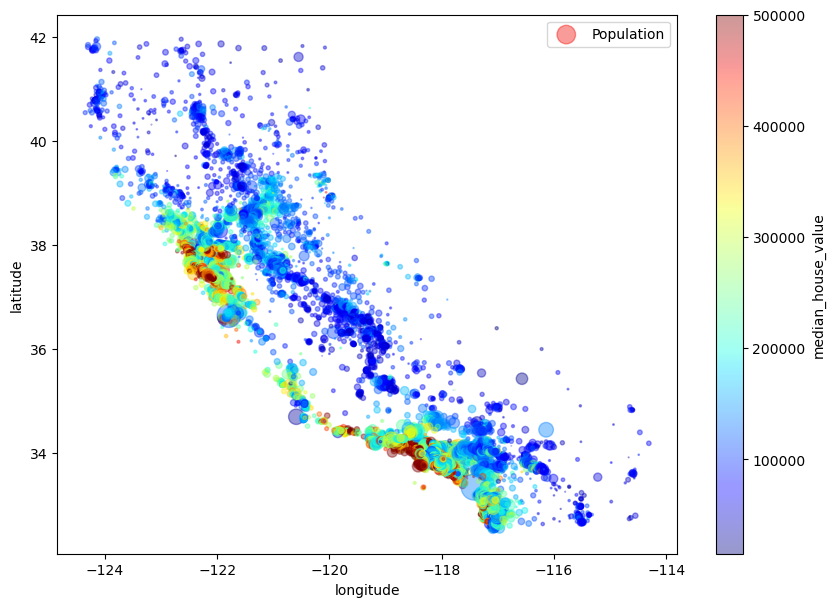

In [21]:
df.plot(kind="scatter", x="longitude", y ="latitude", alpha = 0.4, s = df["population"]/100, label = "Population",
             figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"), colorbar = True)
plt.legend()

In [22]:
correlation = df.corr()
correlation["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

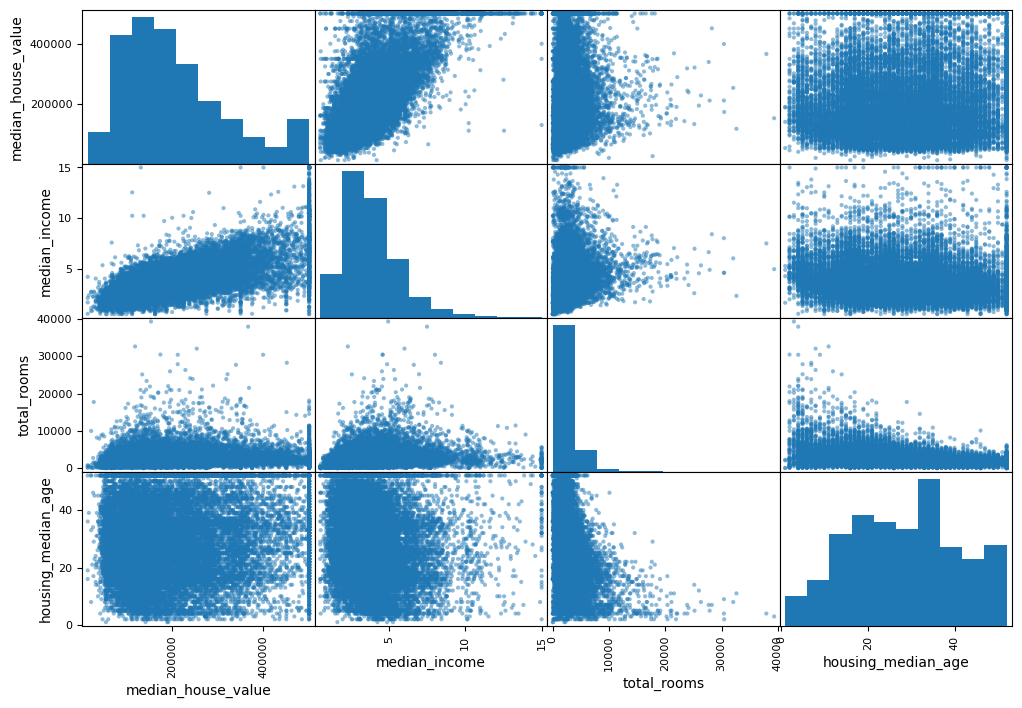

In [23]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms",
 "housing_median_age"]
scatter_matrix(df[attributes], figsize=(12, 8))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

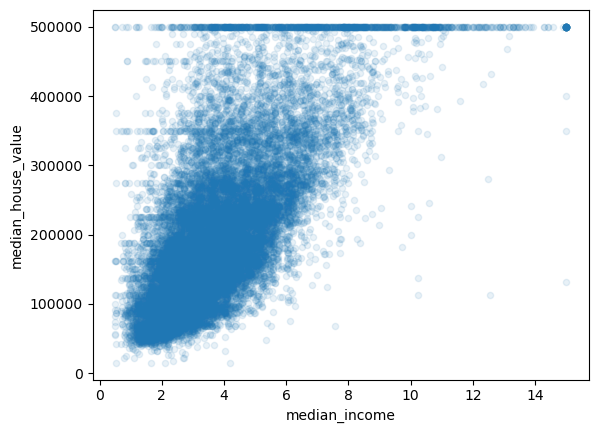

In [24]:
df.plot(kind="scatter", x="median_income", y="median_house_value",
 alpha=0.1)

In [25]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [28]:
df["rooms_per_household"] = df["total_rooms"]/df["households"]
df["population_per_household"] =  df["population"]/df["households"]
#Creating bedroom per household
df["bedroom_per_household"] =  df["total_bedrooms"]/ df["households"]
df["bedroom_per_room"] =  df["total_bedrooms"]/ df["total_rooms"]

In [29]:
correlation = df.corr()
correlation["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
bedroom_per_household      -0.046739
latitude                   -0.144160
bedroom_per_room           -0.255880
Name: median_house_value, dtype: float64

<AxesSubplot:>

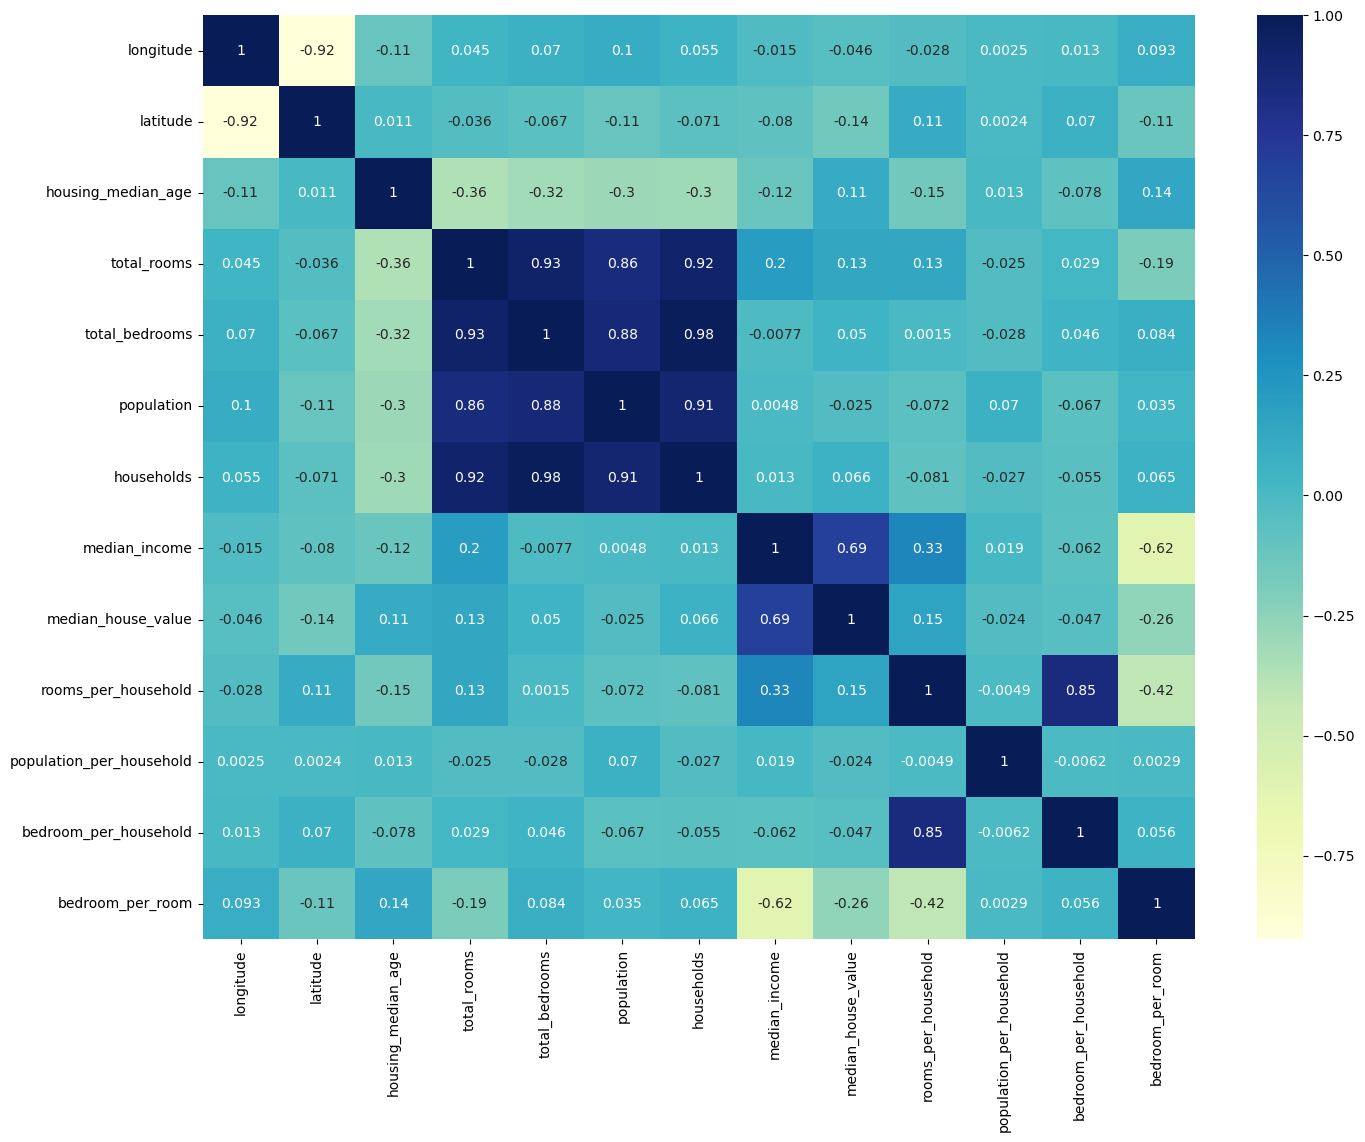

In [30]:
import seaborn as sb
fig = plt.figure(figsize=(16,12))
ax = fig.add_subplot(111)
sb.heatmap(df.corr(),annot=True, cmap="YlGnBu")

In [34]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
population_per_household      0
bedroom_per_household       207
bedroom_per_room            207
dtype: int64